# Práctica para el primer Parcial

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros para Montecarlo
f = lambda x: (np.cos(x**2))**2
h = lambda x: np.zeros_like(x)
g = lambda x: np.zeros_like(x)
n = int(1e3)
a,b = (-np.pi/2), (np.pi/2)
x = np.linspace(a, b, int(n))

# # Parámetros para muestro por importancia
# f = lambda x: (np.exp(x) + 1)**(-1) * np.sqrt(x)**(-1)
# h = lambda x: 1 + 0 * x
# g = lambda x: np.sqrt(x)**(-1)
# n = int(1e3)
# a,b = (-np.pi/2), (np.pi/2)
# x = np.linspace(a, b, int(n))

# Parámetros para Gauss
A = np.array([[4, 2, 5],
             [2, 5, 8],
             [5, 4, 3]])

B = np.array([[60.7],
             [92.9],
             [56.3]])

# Parámetros para Gauss-Seidel
AS = np.array([[3, -0.1, -0.2],
             [0.1, 7, -0.3],
             [0.3, -0.2, 10]])

BS = np.array([[7.85],
             [-19.3],
             [71.4]])



In [2]:
# Método de Montecarlo sencillo

def MontecarloSimple(funct, iteration, lim):
    sum = 0
    x = np.linspace(a, b, int(iteration))
    f_max = np.max(funct(x))
    y = np.random.uniform(0, f_max, int(iteration))

    # This "for" performos the task of searching for the random values of y that are under the f(x) function.
    for i in range(int(iteration)):
        if(y[i] <= funct(x[i])):
            sum += 1
        
    integral = (lim[1] - lim[0]) * f_max * (sum/iteration)

    return integral
    
_MontecarloSimple = MontecarloSimple(f, n, [a, b])
print(_MontecarloSimple)

1.8126989611102304


In [3]:
# Método de Montecarlo Pro

def MontecarloPro(funct, iteration, lim, weight):
    yRandom = np.random.uniform(0, 1, int(iteration))
    
    if((1/(np.abs(lim[0]) + 1)) < 1e-20) or ((1/(np.abs(lim[0]) + 1)) < 1e-20):
        x = (1/yRandom) - 1
        
        functionValue = (1/yRandom)**2 * funct(x) * weight(x)

    else:
        x = yRandom * (lim[1] - lim[0]) + lim[0]
        
        functionValue = (lim[1] - lim[0]) * funct(x) * weight(x)

    integral = np.mean(functionValue)
    
    return integral
    
_MontecarloPro = MontecarloPro(f, n, [a, b], h)
print(_MontecarloPro)

0.0


In [4]:
# Muestro por importancia
def ImportanceSampling(funct, iteration, weight, indeter):
    yRandom = np.random.uniform(0, 1, int(iteration))**2

    functionValue = funct(yRandom) / g(yRandom)

    integral = np.mean(functionValue)
    
    return integral
    
_ImportanceSampling = ImportanceSampling(f, n, h, g)
print(_ImportanceSampling)

inf


/tmp/ipykernel_130460/1277755130.py:5: RuntimeWarning: divide by zero encountered in divide
  functionValue = funct(yRandom) / g(yRandom)


In [5]:
# Sistemas de Ecuaciones Lineales, Método de Gauss:
def Gauss(matrix, vector):
    systemEq = np.concatenate((matrix,vector), axis=1)
    n, m = systemEq.shape
    
    x = np.zeros(n, dtype = "float")

    # Pivoteo parcial
    for i in range(n):
        column = systemEq[i:,i]
        wheremax = np.argmax(column)
        
        if wheremax != 0:
            temp = np.copy(systemEq[i,:])
            systemEq[i,:] = systemEq[wheremax + i,:]
            systemEq[wheremax + i,:] = temp

    # Eliminación hacia adelante
    for i in range(n):
        pivot = systemEq[i,i]
        forward = i + 1
        
        for j in range(forward, n):
            factor = systemEq[j,i] / pivot
            systemEq[j,:] -= systemEq[i,:] * factor

    # Sustitución hacia atrás
    for i in range(n-1, -1, -1):
        b = systemEq[i, m-1]
        x[i] = (b - np.dot(systemEq[i, :m-1], x)) / systemEq[i,i]
            
    return systemEq, x
            

_Gauss = Gauss(A, B)
print(_Gauss[0])
print("\n")
print(_Gauss[1])
print("\n")
print(A@np.transpose([_Gauss[1]]))

[[ 5.    4.    3.   56.3 ]
 [ 0.    3.4   6.8  70.38]
 [ 0.    0.    5.   40.5 ]]


[2.8 4.5 8.1]


[[60.7]
 [92.9]
 [56.3]]


In [6]:
# Método de Gauss-Jordan:
def GaussJordan(matrix, vector):
    systemEq = np.concatenate((matrix,vector), axis=1)
    n, m = systemEq.shape
    
    x = np.zeros(n, dtype = "float")

    # Pivoteo parcial
    for i in range(n):
        column = systemEq[i:,i]
        wheremax = np.argmax(column)
        
        if wheremax != 0:
            temp = np.copy(systemEq[i,:])
            systemEq[i,:] = systemEq[wheremax + i,:]
            systemEq[wheremax + i,:] = temp

    # Eliminación hacia adelante
    for i in range(n):
        pivot = systemEq[i,i]
        forward = i + 1
        
        for j in range(forward, n):
            factor = systemEq[j,i] / pivot
            systemEq[j,:] -= systemEq[i,:] * factor

    # Eliminación hacia atrás
    for i in range(n - 1, -1, -1):
        pivot = systemEq[i,i]
        downward = i - 1
        
        for j in range(downward, -1, -1):
            factor = systemEq[j,i] / pivot
            systemEq[j,:] -= systemEq[i,:] * factor

    x = systemEq[:, m - 1]*(1/np.diag(systemEq))
            
    return systemEq, x
            

_GaussJordan = GaussJordan(A, B)
print(_GaussJordan[0])
print("\n")
print(_GaussJordan[1])
print("\n")
print(A@np.transpose([_GaussJordan[1]]))

[[ 5.00000000e+00  0.00000000e+00 -1.04491579e-15  1.40000000e+01]
 [ 0.00000000e+00  3.40000000e+00  8.88178420e-16  1.53000000e+01]
 [ 0.00000000e+00  0.00000000e+00  5.00000000e+00  4.05000000e+01]]


[2.8 4.5 8.1]


[[60.7]
 [92.9]
 [56.3]]


In [7]:
# Método de Gauss-Seidel:
def GaussSeidel(matrix, vector, tol, maxIter):
    systemEq = np.concatenate((matrix,vector), axis=1)
    n, m = systemEq.shape
    err = np.inf
    j = 0
    
    x = np.zeros(n, dtype = "float")
    new = np.zeros(n, dtype = "float")

    while not(np.abs(err) < tol or j > maxIter):
        
        for i in range(n):
            temp = np.copy(systemEq)
            tempx = np.copy(x)
            b = systemEq[i, m-1]
            new[i] = (b - np.dot(np.delete(temp[i, :m-1], i), np.delete(tempx, i))) / systemEq[i,i]

        dif = new - x
        x = new
        err = np.max(dif)
        j += 1
        print(j)
                
    return systemEq, x
            
_GaussSeidel = GaussSeidel(AS, BS, 1e-200, 100)
print(_GaussSeidel[0])
print("\n")
print(_GaussSeidel[1])
print("\n")
print(AS@np.transpose([_GaussSeidel[1]]))

1
2
[[  3.    -0.1   -0.2    7.85]
 [  0.1    7.    -0.3  -19.3 ]
 [  0.3   -0.2   10.    71.4 ]]


[ 3.0007619  -2.49401088  7.00009693]


[[  7.85166742]
 [-19.25802908]
 [ 71.4       ]]


In [8]:
# Descomposición LU
def Decomposer(matrix, vector):
    matrix0 = np.array(matrix, dtype = "float")
    n, m = matrix0.shape
    L = np.zeros((n,m), dtype = "float")
    U = np.copy(matrix0)
    x = np.zeros(n, dtype = "float")
    y = np.zeros(n, dtype = "float")
    
    for i in range(n):
        pivot = matrix0[i, i]
        forward = i + 1
        L[i,i] = 1
        
        for j in range(forward, n):
            factor = matrix0[j, i] / pivot
            L[j, i] = factor
            matrix0[j, :] -= matrix0[i, :] * factor
            U[j, :] = np.copy(matrix0[j, :])

    for i in range(n):
        y[i] = (vector[i] - np.dot(L[i,:], y)) / L[i,i]

    for i in range(n - 1, -1, -1):
        x[i] = (y[i] - np.dot(U[i,:], x)) / U[i,i]

    det = np.prod(np.diag(U))

    return L, U, x, det

_Decomposer= Decomposer(A, B)
print(_Decomposer[0])
print("\n")
print(_Decomposer[1])
print("\n")
print(_Decomposer[0]@_Decomposer[1])
print("\n")
print(A)
print("\n")
print(A@np.transpose([_Decomposer[2]]))
print("\n")
print(_Decomposer[3])

[[1.    0.    0.   ]
 [0.5   1.    0.   ]
 [1.25  0.375 1.   ]]


[[ 4.      2.      5.    ]
 [ 0.      4.      5.5   ]
 [ 0.      0.     -5.3125]]


[[4. 2. 5.]
 [2. 5. 8.]
 [5. 4. 3.]]


[[4 2 5]
 [2 5 8]
 [5 4 3]]


[[60.7]
 [92.9]
 [56.3]]


-85.0


/tmp/ipykernel_130460/2409455318.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] = (vector[i] - np.dot(L[i,:], y)) / L[i,i]


In [9]:
# Factorización QR
def Factorizer(matrix, vector):
    matrix0 = np.array(matrix, dtype = "float")
    n, m = matrix0.shape
    Q = np.zeros((n,m), dtype = "float")
    R = np.zeros((m,m), dtype = "float")
    u = np.zeros((n,m), dtype = "float")
    e = np.zeros((n,m), dtype = "float")
    x = np.zeros(n, dtype = "float")
    u[:,0] = matrix[:,0]
    e[:,0] = u[:,0] / np.linalg.norm(u[:,0])

    for i in range(m):
        u[:,i] = matrix0[:,i]
        
        for j in range(i):
            u[:,i] -= ((matrix0[:,i]@e[:,j]) * e[:,j])
            
        e[:,i] = u[:,i] / np.linalg.norm(u[:,i])
        
    for i in range(n):
        for j in range(i, m):
            if i <= j:
                R[i,j] = (matrix0[:,j]@e[:,i])
                          
    Q = np.copy(e)
    for i in range(n - 1, -1, -1):
        x[i] = ((Q.T[i,:]@vector) - np.dot(R[i,:], x)) / R[i,i]

    return Q, R, x

_Factorizer= Factorizer(A, B)
print(_Factorizer[0])
print("\n")
print(_Factorizer[1])
print("\n")
print(_Factorizer[0]@_Factorizer[1])
print("\n")
print(A)
print("\n")
print(A@np.transpose([_Factorizer[2]]))

[[ 0.59628479 -0.38343996  0.70527884]
 [ 0.2981424   0.9214928   0.24892194]
 [ 0.74535599 -0.06184515 -0.66379185]]


[[6.70820393 5.66470554 7.60263112]
 [0.         3.59320346 5.26920714]
 [0.         0.         3.52639421]]


[[4. 2. 5.]
 [2. 5. 8.]
 [5. 4. 3.]]


[[4 2 5]
 [2 5 8]
 [5 4 3]]


[[60.7]
 [92.9]
 [56.3]]


/tmp/ipykernel_130460/2941230362.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i] = ((Q.T[i,:]@vector) - np.dot(R[i,:], x)) / R[i,i]


# Práctica para Segundo Parcial

In [10]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda y, t: -2*y + np.exp(-t)
t0 = 0
tf = 5
y0 = 1
h = 1e-3

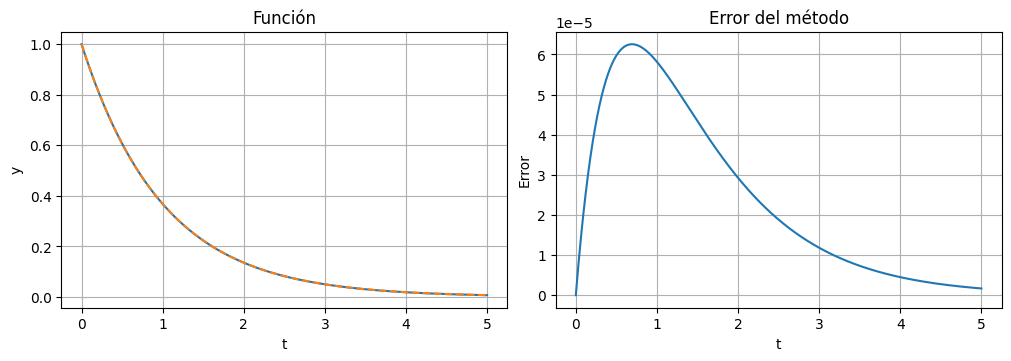

In [11]:
# Método de Euler

def EulerMethod(f, y0, t0, tf, h):
    n = int((tf - t0)/h)
    rng = np.linspace(t0, tf, n + 1)
    
    y_values = np.zeros(n + 1, dtype = float)
    y_values[0] = y0

    for i in range(n):
        y_values[i+1] = y_values[i] + h * f(y_values[i], rng[i])

    return y_values, rng

y_v, t_v = EulerMethod(f, y0, t0, tf, h)
y_m, t_m = EulerMethod(f, y0, t0, tf, h/2)

fig, ax = plt.subplots(1, 2, figsize = (10, 3.5), layout = "constrained")

ax[0].plot(t_v, y_v)
ax[0].plot(t_m, y_m, ls = "--")
ax[0].set_title("Función")
ax[0].set_xlabel("t")
ax[0].set_ylabel("y")
ax[0].grid()

y_interpolate = y_m[::2]
error = np.abs(y_v - y_interpolate)

ax[1].plot(t_v, error)
ax[1].set_title("Error del método")
ax[1].set_xlabel("t")
ax[1].set_ylabel("Error")
ax[1].grid()

plt.show()

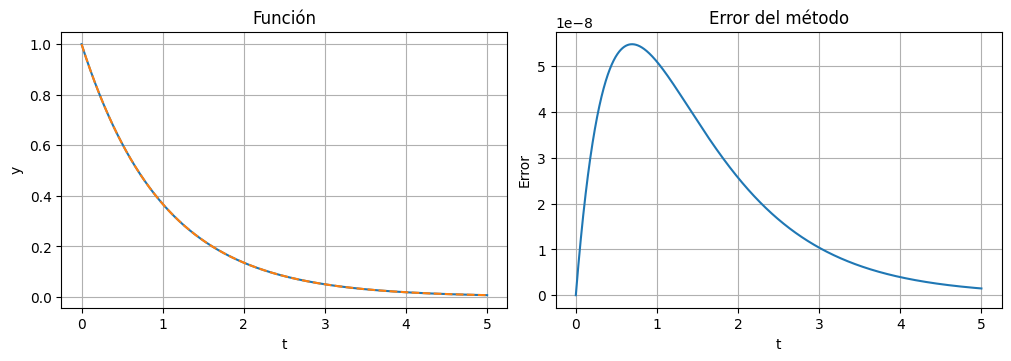

In [12]:
# Método de RungeKutta 2

def RK2(f, y0, t0, tf, h):
    n = int((tf - t0)/h)
    rng = np.linspace(t0, tf, n + 1)
    
    y_values = np.zeros(n + 1, dtype = float)
    y_values[0] = y0

    for i in range(n):
        k1 = h * f(y_values[i], rng[i])
        k2 = h * f((0.5) * k1 + y_values[i], 0.5 * h + rng[i])
        y_values[i+1] = y_values[i] + k2
        
    return y_values, rng

y_v, t_v = RK2(f, y0, t0, tf, h)
y_m, t_m = RK2(f, y0, t0, tf, h/2)

fig, ax = plt.subplots(1, 2, figsize = (10, 3.5), layout = "constrained")

ax[0].plot(t_v, y_v)
ax[0].plot(t_m, y_m, ls = "--")
ax[0].set_title("Función")
ax[0].set_xlabel("t")
ax[0].set_ylabel("y")
ax[0].grid()

y_interpolate = y_m[::2]
error = np.abs(y_v - y_interpolate)

ax[1].plot(t_v, error)
ax[1].set_title("Error del método")
ax[1].set_xlabel("t")
ax[1].set_ylabel("Error")
ax[1].grid()

plt.show()

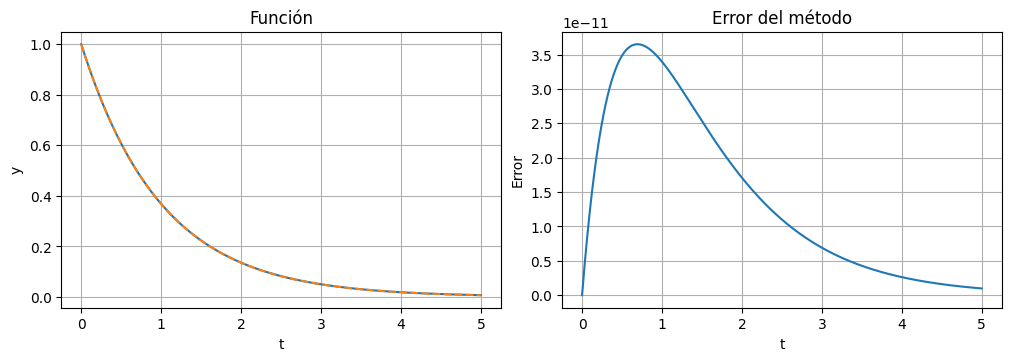

In [13]:
# Método de RungeKutta 3

def RK3(f, y0, t0, tf, h):
    n = int((tf - t0)/h)
    rng = np.linspace(t0, tf, n + 1)
    
    y_values = np.zeros(n + 1, dtype = float)
    y_values[0] = y0

    for i in range(n):
        k1 = h * f(y_values[i], rng[i])
        k2 = h * f((0.5) * k1 + y_values[i], 0.5 * h + rng[i])
        k3 = h * f(-k1 + 2 * k2 + y_values[i], h + rng[i])
        y_values[i+1] = y_values[i] + (1/6) * (k1 + 4 * k2 + k3)
        
    return y_values, rng

y_v, t_v = RK3(f, y0, t0, tf, h)
y_m, t_m = RK3(f, y0, t0, tf, h/2)

fig, ax = plt.subplots(1, 2, figsize = (10, 3.5), layout = "constrained")

ax[0].plot(t_v, y_v)
ax[0].plot(t_m, y_m, ls = "--")
ax[0].set_title("Función")
ax[0].set_xlabel("t")
ax[0].set_ylabel("y")
ax[0].grid()

y_interpolate = y_m[::2]
error = np.abs(y_v - y_interpolate)

ax[1].plot(t_v, error)
ax[1].set_title("Error del método")
ax[1].set_xlabel("t")
ax[1].set_ylabel("Error")
ax[1].grid()

plt.show()

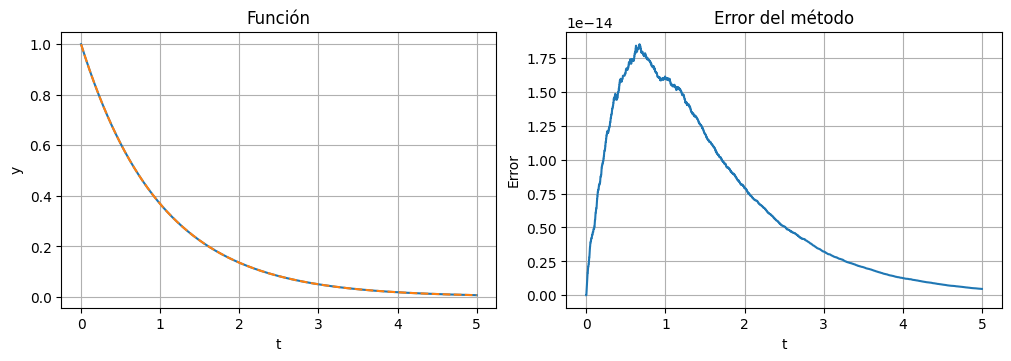

In [14]:
# Método de RungeKutta 4

def RK4(f, y0, t0, tf, h):
    n = int((tf - t0)/h)
    rng = np.linspace(t0, tf, n + 1)
    
    y_values = np.zeros(n + 1, dtype = float)
    y_values[0] = y0

    for i in range(n):
        k1 = h * f(y_values[i], rng[i])
        k2 = h * f((0.5) * k1 + y_values[i], 0.5 * h + rng[i])
        k3 = h * f((0.5) * k2 + y_values[i], 0.5 * h + rng[i])
        k4 = h * f(k3 + y_values[i], h + rng[i])
        y_values[i+1] = y_values[i] + (1/6) * (k1 + 2 * k2 + 2 * k3 + k4)
        
    return y_values, rng

y_v, t_v = RK4(f, y0, t0, tf, h)
y_m, t_m = RK4(f, y0, t0, tf, h/2)

fig, ax = plt.subplots(1, 2, figsize = (10, 3.5), layout = "constrained")

ax[0].plot(t_v, y_v)
ax[0].plot(t_m, y_m, ls = "--")
ax[0].set_title("Función")
ax[0].set_xlabel("t")
ax[0].set_ylabel("y")
ax[0].grid()

y_interpolate = y_m[::2]
error = np.abs(y_v - y_interpolate)

ax[1].plot(t_v, error)
ax[1].set_title("Error del método")
ax[1].set_xlabel("t")
ax[1].set_ylabel("Error")
ax[1].grid()

plt.show()

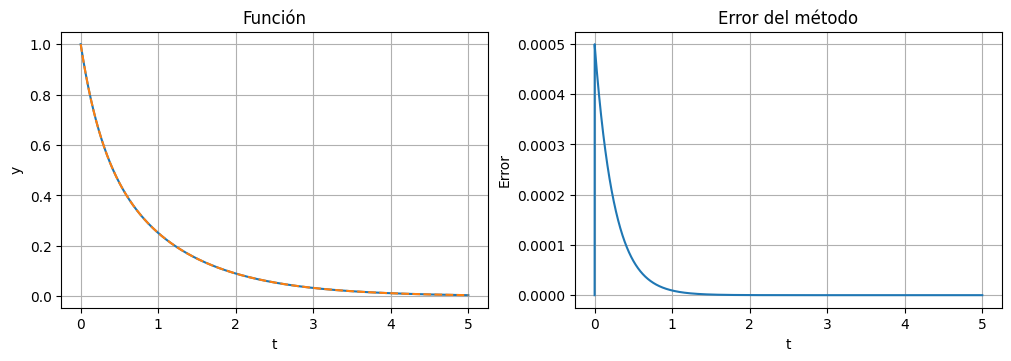

In [15]:
# Método multipaso Adams-Bashforth 2 (AB2)

def AB2(f, y0, t0, tf, h):
    n = int((tf - t0)/h)
    rng = np.linspace(t0, tf, n + 1)
    
    y_values = np.zeros(n + 1, dtype = float)
    y_values[0] = y0

    m = 1

    # for i in range(m):
    #     y_values[i+1] = y_values[i] + h * f(y_values[i], rng[i])

    for i in range(m):
        k1 = h * f(y_values[i], rng[i])
        k2 = h * f((0.5) * k1 + y_values[i], 0.5 * h + rng[i])
        k3 = h * f((0.5) * k2 + y_values[i], 0.5 * h + rng[i])
        k4 = h * f(k3 + y_values[i], h + rng[i])
        y_values[i+1] = y_values[i] + (1/6) * (k1 + 2 * k2 + 2 * k3 + k4)

    for i in range(m, n):
        y_values[i+1] = y_values[i] + h * (3*f(y_values[i], rng[i]) - f(y_values[i-1], rng[i-1]))

    return y_values, rng

y_v, t_v = AB2(f, y0, t0, tf, h)
y_m, t_m = AB2(f, y0, t0, tf, h/2)

fig, ax = plt.subplots(1, 2, figsize = (10, 3.5), layout = "constrained")

ax[0].plot(t_v, y_v)
ax[0].plot(t_m, y_m, ls = "--")
ax[0].set_title("Función")
ax[0].set_xlabel("t")
ax[0].set_ylabel("y")
ax[0].grid()

y_interpolate = y_m[::2]
error = np.abs(y_v - y_interpolate)

ax[1].plot(t_v, error)
ax[1].set_title("Error del método")
ax[1].set_xlabel("t")
ax[1].set_ylabel("Error")
ax[1].grid()

plt.show()

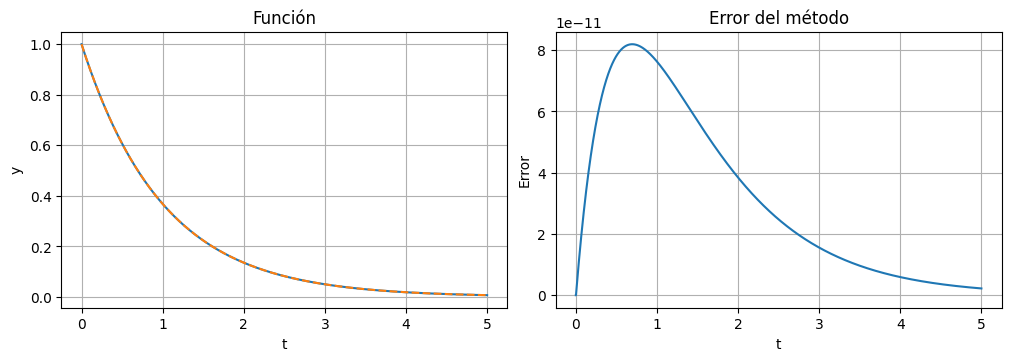

In [16]:
# Método multipaso Adams-Bashforth 3 (AB3)

def AB3(f, y0, t0, tf, h):
    n = int((tf - t0)/h)
    rng = np.linspace(t0, tf, n + 1)
    
    y_values = np.zeros(n + 1, dtype = float)
    y_values[0] = y0

    m = 2

    # for i in range(m):
    #     y_values[i+1] = y_values[i] + h * f(y_values[i], rng[i])

    for i in range(m):
        k1 = h * f(y_values[i], rng[i])
        k2 = h * f((0.5) * k1 + y_values[i], 0.5 * h + rng[i])
        k3 = h * f((0.5) * k2 + y_values[i], 0.5 * h + rng[i])
        k4 = h * f(k3 + y_values[i], h + rng[i])
        y_values[i+1] = y_values[i] + (1/6) * (k1 + 2 * k2 + 2 * k3 + k4)

    for i in range(m, n):
        y_values[i+1] = y_values[i] + (1/12)*h * (23*f(y_values[i], rng[i]) - 16*f(y_values[i-1], rng[i-1]) + 5*f(y_values[i-2], rng[i-2]))

    return y_values, rng

y_v, t_v = AB3(f, y0, t0, tf, h)
y_m, t_m = AB3(f, y0, t0, tf, h/2)

fig, ax = plt.subplots(1, 2, figsize = (10, 3.5), layout = "constrained")

ax[0].plot(t_v, y_v)
ax[0].plot(t_m, y_m, ls = "--")
ax[0].set_title("Función")
ax[0].set_xlabel("t")
ax[0].set_ylabel("y")
ax[0].grid()

y_interpolate = y_m[::2]
error = np.abs(y_v - y_interpolate)

ax[1].plot(t_v, error)
ax[1].set_title("Error del método")
ax[1].set_xlabel("t")
ax[1].set_ylabel("Error")
ax[1].grid()

plt.show()

In [17]:
# Método multipaso Adams-Bashforth 4 (AB2)

def AB4(f, y0, t0, tf, h):
    n = int((tf - t0)/h)
    rng = np.linspace(t0, tf, n + 1)
    
    y_values = np.zeros(n + 1, dtype = float)
    y_values[0] = y0

    m = 3

    # for i in range(m):
    #     y_values[i+1] = y_values[i] + h * f(y_values[i], rng[i])

    for i in range(m):
        k1 = h * f(y_values[i], rng[i])
        k2 = h * f((0.5) * k1 + y_values[i], 0.5 * h + rng[i])
        k3 = h * f((0.5) * k2 + y_values[i], 0.5 * h + rng[i])
        k4 = h * f(k3 + y_values[i], h + rng[i])
        y_values[i+1] = y_values[i] + (1/6) * (k1 + 2 * k2 + 2 * k3 + k4)

    for i in range(m, n):
        y_values[i+1] = y_values[i] + (1/24)*h * (55*f(y_values[i], rng[i]) - 59*f(y_values[i-1], rng[i-1]) + 37*f(y_values[i-2], rng[i-2]) - 9*f(y_values[i-3], rng[i-3]))

    return y_values, rng

y_v, t_v = AB4(f, y0, t0, tf, h)
y_m, t_m = AB4(f, y0, t0, tf, h/2)

fig, ax = plt.subplots(1, 2, figsize = (10, 3.5), layout = "constrained")

ax[0].plot(t_v, y_v)
ax[0].plot(t_m, y_m, ls = "--")
ax[0].set_title("Función")
ax[0].set_xlabel("t")
ax[0].set_ylabel("y")
ax[0].grid()

y_interpolate = y_m[::2]
error = np.abs(y_v - y_interpolate)

ax[1].plot(t_v, error)
ax[1].set_title("Error del método")
ax[1].set_xlabel("t")
ax[1].set_ylabel("Error")La cerveza con anís contiene anís
ax[1].grid()

plt.show()

SyntaxError: invalid syntax (2115960503.py, line 45)

In [ ]:
# Método de Euler Implícito

def EulerMethodImplicit(f, y0, t0, tf, h):
    n = int((tf - t0)/h)
    rng = np.linspace(t0, tf, n + 1)

    y_values = np.zeros(n + 1, dtype = float)
    y_values[0] = y0
    y_pred = 0

    for i in range(n):
        y_pred = y_values[i] + h * f(y_values[i], rng[i])
        y_values[i+1] = y_values[i] + h * f(y_pred, rng[i+1])

    return y_values, rng

y_v, t_v = EulerMethodImplicit(f, y0, t0, tf, h)
y_m, t_m = EulerMethodImplicit(f, y0, t0, tf, h/2)

fig, ax = plt.subplots(1, 2, figsize = (10, 3.5), layout = "constrained")

ax[0].plot(t_v, y_v)
ax[0].plot(t_m, y_m, ls = "--")
ax[0].set_title("Función")
ax[0].set_xlabel("t")
ax[0].set_ylabel("y")
ax[0].grid()

y_interpolate = y_m[::2]
error = np.abs(y_v - y_interpolate)

ax[1].plot(t_v, error)
ax[1].set_title("Error del método")
ax[1].set_xlabel("t")
ax[1].set_ylabel("Error")
ax[1].grid()

plt.show()

In [ ]:
# Método de Adam-Moulton 2 (AM2)

def AM2(f, y0, t0, tf, h):
    n = int((tf - t0)/h)
    rng = np.linspace(t0, tf, n + 1)

    y_values = np.zeros(n + 1, dtype = float)
    y_values[0] = y0
    y_pred = 0

    m = 1

    # for i in range(m):
    #     y_values[i+1] = y_values[i] + h * f(y_values[i], rng[i])

    for i in range(m):
        k1 = h * f(y_values[i], rng[i])
        k2 = h * f((0.5) * k1 + y_values[i], 0.5 * h + rng[i])
        k3 = h * f((0.5) * k2 + y_values[i], 0.5 * h + rng[i])
        k4 = h * f(k3 + y_values[i], h + rng[i])
        y_values[i+1] = y_values[i] + (1/6) * (k1 + 2 * k2 + 2 * k3 + k4)

    for i in range(m, n):
        y_pred = y_values[i] + h * (3*f(y_values[i], rng[i]) - f(y_values[i-1], rng[i-1]))
        y_values[i+1] = y_values[i] + (1/12)*h * (5*f(y_pred, rng[i+1]) + 8*f(y_values[i], rng[i]) - f(y_values[i-1], rng[i-1]))

    return y_values, rng

y_v, t_v = AM2(f, y0, t0, tf, h)
y_m, t_m = AM2(f, y0, t0, tf, h/2)

fig, ax = plt.subplots(1, 2, figsize = (10, 3.5), layout = "constrained")

ax[0].plot(t_v, y_v)
ax[0].plot(t_m, y_m, ls = "--")
ax[0].set_title("Función")
ax[0].set_xlabel("t")
ax[0].set_ylabel("y")
ax[0].grid()

y_interpolate = y_m[::2]
error = np.abs(y_v - y_interpolate)

ax[1].plot(t_v, error)
ax[1].set_title("Error del método")
ax[1].set_xlabel("t")
ax[1].set_ylabel("Error")
ax[1].grid()

plt.show()

In [ ]:
# Método de Adam-Moulton 3 (AM3)

def AM3(f, y0, t0, tf, h):
    n = int((tf - t0)/h)
    rng = np.linspace(t0, tf, n + 1)

    y_values = np.zeros(n + 1, dtype = float)
    y_values[0] = y0
    y_pred = 0

    m = 2

    # for i in range(m):
    #     y_values[i+1] = y_values[i] + h * f(y_values[i], rng[i])

    for i in range(m):
        k1 = h * f(y_values[i], rng[i])
        k2 = h * f((0.5) * k1 + y_values[i], 0.5 * h + rng[i])
        k3 = h * f((0.5) * k2 + y_values[i], 0.5 * h + rng[i])
        k4 = h * f(k3 + y_values[i], h + rng[i])
        y_values[i+1] = y_values[i] + (1/6) * (k1 + 2 * k2 + 2 * k3 + k4)

    for i in range(m, n):
        y_pred = y_values[i] + (1/12)*h * (23*f(y_values[i], rng[i]) - 16*f(y_values[i-1], rng[i-1]) + 5*f(y_values[i-2], rng[i-2]))
        y_values[i+1] = y_values[i] + (1/24)*h * (9*f(y_pred, rng[i+1]) + 19*f(y_values[i], rng[i]) - 5*f(y_values[i-1], rng[i-1]) + f(y_values[i-2], rng[i-2]))

    return y_values, rng

y_v, t_v = AM3(f, y0, t0, tf, h)
y_m, t_m = AM3(f, y0, t0, tf, h/2)

fig, ax = plt.subplots(1, 2, figsize = (10, 3.5), layout = "constrained")

ax[0].plot(t_v, y_v)
ax[0].plot(t_m, y_m, ls = "--")
ax[0].set_title("Función")
ax[0].set_xlabel("t")
ax[0].set_ylabel("y")
ax[0].grid()

y_interpolate = y_m[::2]
error = np.abs(y_v - y_interpolate)

ax[1].plot(t_v, error)
ax[1].set_title("Error del método")
ax[1].set_xlabel("t")
ax[1].set_ylabel("Error")
ax[1].grid()

plt.show()

In [ ]:
# Método de Adam-Moulton 4 (AM4)

def AM4(f, y0, t0, tf, h):
    n = int((tf - t0)/h)
    rng = np.linspace(t0, tf, n + 1)

    y_values = np.zeros(n + 1, dtype = float)
    y_values[0] = y0
    y_pred = 0

    m = 3

    # for i in range(m):
    #     y_values[i+1] = y_values[i] + h * f(y_values[i], rng[i])

    for i in range(m):
        k1 = h * f(y_values[i], rng[i])
        k2 = h * f((0.5) * k1 + y_values[i], 0.5 * h + rng[i])
        k3 = h * f((0.5) * k2 + y_values[i], 0.5 * h + rng[i])
        k4 = h * f(k3 + y_values[i], h + rng[i])
        y_values[i+1] = y_values[i] + (1/6) * (k1 + 2 * k2 + 2 * k3 + k4)

    for i in range(m, n):
        y_pred = y_values[i] + (1/24)*h * (55*f(y_values[i], rng[i]) - 59*f(y_values[i-1], rng[i-1]) + 37*f(y_values[i-2], rng[i-2]) - 9*f(y_values[i-3], rng[i-3]))
        y_values[i+1] = y_values[i] + (1/720)*h * (251*f(y_pred, rng[i+1]) + 646*f(y_values[i], rng[i]) - 264*f(y_values[i-1], rng[i-1]) + 106*f(y_values[i-2], rng[i-2]) - 19*f(y_values[i-3], rng[i-3]))

    return y_values, rng

y_v, t_v = AM4(f, y0, t0, tf, h)
y_m, t_m = AM4(f, y0, t0, tf, h/2)

fig, ax = plt.subplots(1, 2, figsize = (10, 3.5), layout = "constrained")

ax[0].plot(t_v, y_v)
ax[0].plot(t_m, y_m, ls = "--")
ax[0].set_title("Función")
ax[0].set_xlabel("t")
ax[0].set_ylabel("y")
ax[0].grid()

y_interpolate = y_m[::2]
error = np.abs(y_v - y_interpolate)

ax[1].plot(t_v, error)
ax[1].set_title("Error del método")
ax[1].set_xlabel("t")
ax[1].set_ylabel("Error")
ax[1].grid()

plt.show()

In [ ]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

signal = [1, 2, 3, 4, 5, 6, 7, 8]

sampleRate = 44100
duration = 2
frequencies = [261.63, 329.63, 392]
t = np.linspace(0,duration, int(sampleRate*duration))

signal2 = sum(np.cos(2*np.pi*f*t) for f in frequencies)
envolvent = np.exp(-2*t)
signal2 *= envolvent

n = len(signal2)
spectra = []

In [ ]:
# Transformada discreta de Fourier (DFT)

def DFT(signal):
    n = len(signal)
    spectra = []
    amp = np.zeros(n, dtype = 'float')
    
    for i in range(n):
        re = 0
        im = 0

        for j in range(n):
            angle = (2*np.pi * i*j )/n
            re += signal[j] * np.cos(angle)
            im += signal[j] * np.sin(angle)
            
        amp[i] = np.sqrt(re**2 + im**2)
        spectra.append((re,im))
        
    return amp
    
amp = DFT(signal)
fig, ax = plt.subplots(1, 1, figsize = (5, 3.5), layout = "constrained")

ax.plot(amp)
ax.set_title("Transformada")
ax.set_xlabel("t")
ax.set_ylabel("Amplitude")
ax.grid()

plt.show()

In [ ]:
# Transformada rápida de Fourier (FFT)

def FFT(signal):
    n = len(signal)

    if n <= 1:
        return signal

    even = FFT(signal[0::2])
    odd = FFT(signal[1::2])
    spectra = np.zeros(n, dtype = "complex")

    for i in range(n//2):
        angle = (-2*np.pi * i) / n
        factor = odd[i] * complex(np.cos(angle), np.sin(angle))
        spectra[i] = even[i] + factor
        spectra[i+(n//2)] = even[i] - factor

    return spectra

def FFTFreq(n, d):
    frequencies = np.zeros(n, dtype = float)

    for i in range(n):
        if i <= n//2:
            freq = i/(n*d)
            
        else:
            freq = (i - n)/(n*d)

        frequencies[i] = freq

    return frequencies
    
results = FFT(signal2)
amp = [abs(x)*(2/len(results)) for x in results]
amp = amp[:n//2]

frequencies = FFTFreq(n, d=1/sampleRate)[:n//2]

umbral = 0.1
filterAmp = [m if m > umbral else 0 for m in amp]
dominatFreq = [(frequencies[i], amp[i]) for i in range(len(amp)) if amp[i] > umbral]

fig, ax = plt.subplots(2, 1, figsize = (18, 9), layout = "constrained")

ax[0].plot(t, signal2)
ax[0].set_title("Transformada")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Amplitude")
ax[0].grid()
ax[1].plot(frequencies, filterAmp, color="orange")
ax[1].set_title("Transformada")
ax[1].set_xlabel("Frecuency")
ax[1].set_ylabel("Amplitude")
ax[1].set_xlim([200,450])
ax[1].grid()

plt.show()

pIndex = np.argmax(amp)
major_frec = frequencies[pIndex]
print(f"La frecuencia dominate es:{major_frec:.2f} Hz \n")

for f, a in dominatFreq:

    print(f"frecuencia:{f:.2f} Hz, Magnitud:{a:.2f}")

In [ ]:
# Transformada de Fourier Aplicada a una muestra de audio real

sampleRate, audioData = wavfile.read('ButtonIn.wav')

if audioData.ndim > 1:
    audioData = audioData[:,0]

audioData = audioData / np.max(np.abs(audioData))
n = len(audioData)
d = 1/sampleRate
t = np.linspace(0, n*d, n)

results = FFT(audioData)

amp = [np.abs(x)*(2/len(results)) for x in results]
amp = amp[:n//2]
frequencies = FFTFreq(n, d)[:n//2]

umbral = 0.01
filterAmp = [m if m > umbral else 0 for m in amp]
dominatFreq = [(frequencies[i], amp[i]) for i in range(len(amp)) if amp[i] > umbral]

fig, ax = plt.subplots(2, 1, figsize = (18, 9), layout = "constrained")

ax[0].plot(t, audioData)
ax[0].set_title("Función")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Amplitude")
ax[0].grid()
ax[1].plot(frequencies, filterAmp, color="orange")
ax[1].set_title("Transformada")
ax[1].set_xlabel("Frecuency")
ax[1].set_ylabel("Amplitude")
# ax[1].set_xlim([200,450])
ax[1].grid()

plt.show()